<a href="https://colab.research.google.com/github/Ayantika1998/Assignments/blob/main/Random_Forest_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Credit Card Defaulter Prediction**


# **Importing Library**

In [3]:
import numpy as np  # for linear algebra
import pandas as pd #  for data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for visualization
from sklearn import metrics #for model performance evaluation
from scipy.stats import norm 
from scipy import stats

# **Loading and checking dataset**

In [4]:
dataset = pd.read_csv('credit_card_defaulter.csv')

In [5]:
print('\nNumber of rows and columns in the data set: ',dataset.shape) #printing no. of rows and coloumns


Number of rows and columns in the data set:  (10000, 5)


In [6]:
dataset.head() # printing top few rows and columns in the dataset

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588


# **EDA**

In [7]:
numerical_ft=dataset[["balance","income"]]
print(numerical_ft)

          balance       income
0      729.526495  44361.62507
1      817.180407  12106.13470
2     1073.549164  31767.13895
3      529.250605  35704.49394
4      785.655883  38463.49588
...           ...          ...
9995   711.555020  52992.37891
9996   757.962918  19660.72177
9997   845.411989  58636.15698
9998  1569.009053  36669.11236
9999   200.922183  16862.95232

[10000 rows x 2 columns]


## **Plots**


### **Correlation Plot**


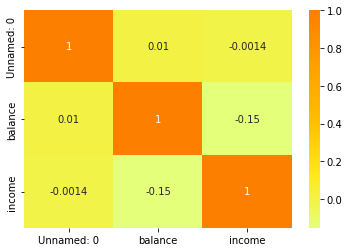

In [8]:
corr = dataset.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

###**Distribution Plot(for continuous variable)**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


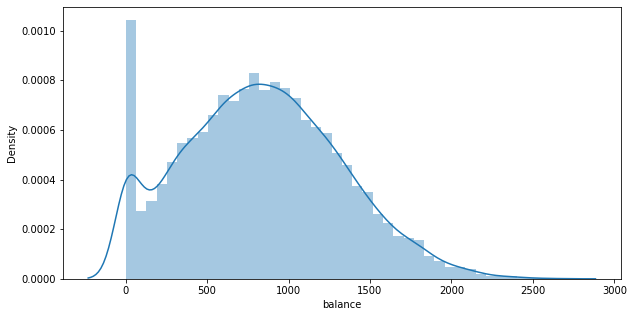

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


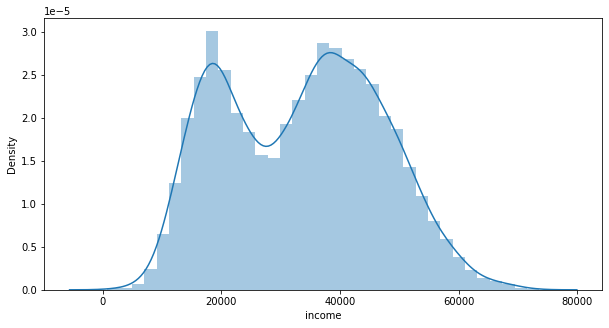

In [9]:
numerical_ft=[col for col in numerical_ft ]
for col in numerical_ft :
    plt.figure(figsize = (10, 5))
    sns.distplot(dataset[col],hist=True)
    plt.show()

###**Plotting Categorical Variable**

In [10]:
categorical_ft=dataset[["default","student"]]
print(categorical_ft)

     default student
0         No      No
1         No     Yes
2         No      No
3         No      No
4         No      No
...      ...     ...
9995      No      No
9996      No      No
9997      No      No
9998      No      No
9999      No     Yes

[10000 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


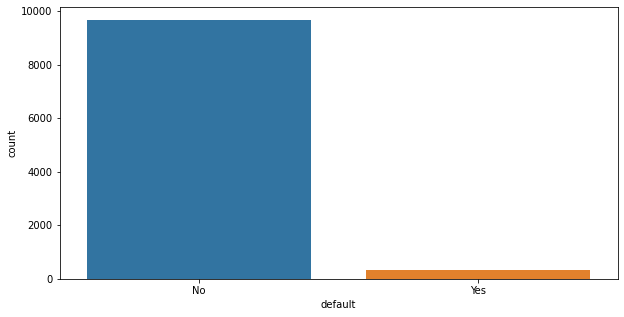

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


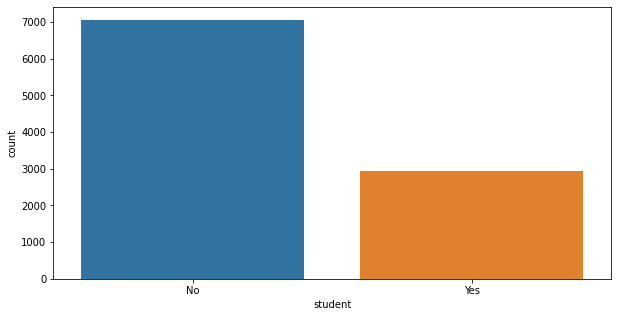

In [11]:
categorical_ft_2=[col for col in categorical_ft if len(dataset[col].unique())<10]
for col in categorical_ft_2 :
    plt.figure(figsize = (10, 5))
    sns.countplot(dataset[col])
    plt.show()

# **Data Preprocessing**

### **Label Encoding**

In [12]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_ft:
    dataset[column] = label.fit_transform(dataset[column])

In [13]:
dataset.head(10)

,Unnamed: 0,default,student,balance,income
0,1,0,0,729.526495,44361.625070
1,2,0,1,817.180407,12106.134700
2,3,0,0,1073.549164,31767.138950
3,4,0,0,529.250605,35704.493940
4,5,0,0,785.655883,38463.495880
5,6,0,1,919.588531,7491.558572
6,7,0,0,825.513331,24905.226580
7,8,0,1,808.667504,17600.451340
8,9,0,0,1161.057854,37468.529290
9,10,0,0,0.000000,29275.268290


### **Plotting categorical variable(Student) against target variable defaulter**

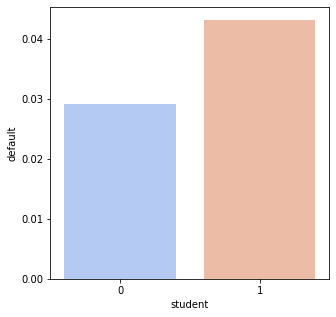

In [14]:
plt.figure(figsize = (5, 5))
sns.barplot(x=dataset["student"],y=dataset["default"],ci=None,palette='coolwarm')
plt.show()

### **Handling Missing Value**

In [15]:
dataset.columns[dataset.isnull().any()]

Index([], dtype='object')

In [16]:
dataset.isna().sum()

Unnamed: 0    0
default       0
student       0
balance       0
income        0
dtype: int64

No Null Value is present

### **Declaring Indepent and Dependent Variable**

In [17]:
X=dataset.drop("default", axis=1)
Y=dataset["default"]

In [18]:
print(X)

      Unnamed: 0  student      balance       income
0              1        0   729.526495  44361.62507
1              2        1   817.180407  12106.13470
2              3        0  1073.549164  31767.13895
3              4        0   529.250605  35704.49394
4              5        0   785.655883  38463.49588
...          ...      ...          ...          ...
9995        9996        0   711.555020  52992.37891
9996        9997        0   757.962918  19660.72177
9997        9998        0   845.411989  58636.15698
9998        9999        0  1569.009053  36669.11236
9999       10000        1   200.922183  16862.95232

[10000 rows x 4 columns]


In [19]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: default, Length: 10000, dtype: int64


### **Splitting Dataset into Trainig And Test Set**

In [20]:
from sklearn.model_selection import train_test_split
test_size = 0.25
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = 20)

### **Printing the shapes of train and test data**

In [21]:
print("X_train shape {}, len {}.".format(X_train.shape,len(X_train)))
print("X_test shape {}, len {}.".format(X_test.shape,len(X_test)))
print("Y_train shape {}, len {}.".format(Y_train.shape,len(Y_train)))
print("Y_test shape {}, len {}.".format(Y_test.shape,len(Y_test)))

X_train shape (7500, 4), len 7500.
X_test shape (2500, 4), len 2500.
Y_train shape (7500,), len 7500.
Y_test shape (2500,), len 2500.


### **Feature Scaling**

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
print(X_train)

[[-0.93805448 -0.65070731 -1.29300898  0.69808848]
 [-0.75963068 -0.65070731 -1.73573502  0.16647769]
 [ 0.51502344 -0.65070731  0.2490771  -0.13266373]
 ...
 [ 0.71913472 -0.65070731  0.25635456  1.21306872]
 [ 0.83125707 -0.65070731  0.40823785  0.86996024]
 [-0.21845808  1.53678925  1.00926279 -1.30465711]]


In [24]:
print(X_test)

[[ 1.72198759 -0.65070731  1.91075749  1.06321109]
 [-1.14876119  1.53678925  1.00609493 -1.67479328]
 [-0.99984327 -0.65070731  0.79383202  1.17146674]
 ...
 [ 0.61430206 -0.65070731 -0.23260505  0.51116789]
 [-1.61391275  1.53678925 -0.04824313 -0.96751867]
 [ 0.68199202 -0.65070731 -0.39426224 -0.08562601]]


# **Random Forest Classifier Model Building** 

### **Building a Random tree classification model**

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

### **Train the model on the train dataset**

In [26]:
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### **Predicting the Test set results**

In [27]:
predict = classifier.predict(X_test)
print(predict)

[1 0 0 ... 0 0 0]


### **Model Summary**
 

**Confusion Matrix**

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

* True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

* True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

* False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

* False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, predict)

print('Confusion matrix\n\n', cm)
accuracy_score(Y_test, predict)

Confusion matrix

 [[2406   18]
 [  52   24]]


0.972

# **XGBoost Classifier Model Building**

### **Building a Random tree classification model**

In [29]:
from xgboost import XGBClassifier
classifier_2 = XGBClassifier()

### **Train the model on the train dataset**

In [30]:
classifier_2.fit(X_train, Y_train)

XGBClassifier()

### **Predicting the Test set results**

In [31]:
predict_2 = classifier_2.predict(X_test)
print(predict_2)

[0 0 0 ... 0 0 0]


### **Model Summary**

**Confusion Matrix**

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
predict_2 = classifier_2.predict(X_test)
cm_2 = confusion_matrix(Y_test, predict_2)
print('Confusion matrix\n\n', cm_2)
accuracy_score(Y_test, predict_2)

Confusion matrix

 [[2413   11]
 [  51   25]]


0.9752

# **Model Evaluation**

## **Classification Report**

**Classification report** is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model.

* **Precision** - It is also called positive predictive value) is the fraction of relevant instances among the retrieved instances

* **Recall** - It is also known as sensitivity is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance.

* **F1 Score** - The F1-score combines the precision and recall of a classifier into a single metric by taking their harmonic mean. Higher the F1 Score better is the model classifier.

* **Accuracy** - It is one metric for evaluating classification models. Accuracy is the fraction of predictions our model got right.
  
  Accuracy = (TF+TN)/Total No. of Prediction


### **Random Forest Classifier**




In [33]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2424
           1       0.57      0.32      0.41        76

    accuracy                           0.97      2500
   macro avg       0.78      0.65      0.70      2500
weighted avg       0.97      0.97      0.97      2500



**Accuracy of Random Classifier is 0.97**

### **XGBoost Classifier**

In [34]:
print(classification_report(Y_test, predict_2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2424
           1       0.69      0.33      0.45        76

    accuracy                           0.98      2500
   macro avg       0.84      0.66      0.72      2500
weighted avg       0.97      0.98      0.97      2500



**Accuracy of XGBoost Classifier is 0.98**

## **AUC-ROC Curve**

**AUC - ROC curve** is a performance measurement for the classification problems at various threshold settings. 

**ROC curve** is a graph created by plotting the true positive rate against the false positive rate by varrying the threshold level of prob to classify the same.ROC is a probability curve.

**AUC** represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting.

### **Random Forest Classifier**

In [35]:
Y_prob = classifier.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  

In [36]:
from sklearn.metrics import roc_curve, auc
auc_roc=metrics.roc_auc_score(Y_test,predict)
auc_roc

0.6541818655549766

In [37]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8294874717734932

Text(0.5, 0, 'False Positive Rate')

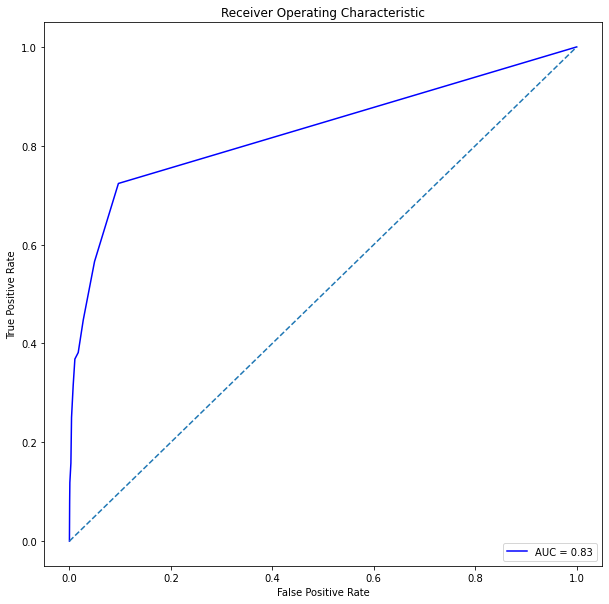

In [38]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='blue',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### **XGBoost Classifier**

In [39]:
Y_prob_2 = classifier_2.predict_proba(X_test)[:,1]

In [40]:
auc_roc=metrics.roc_auc_score(Y_test,predict_2)
auc_roc

0.6622047073128365

In [41]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_prob_2)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9579615033871809

Text(0.5, 0, 'False Positive Rate')

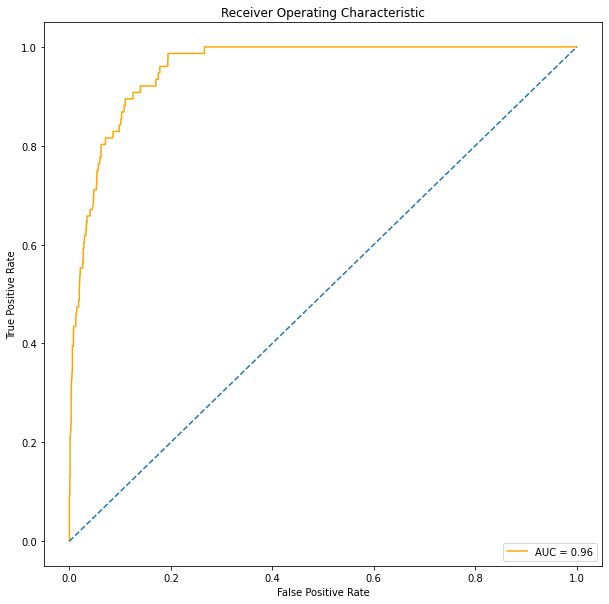

In [42]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='orange',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

**AUC(Area Under Curve) of XGBoost Model 0.96 is higher than Random Forest Model which is 0.83**

**Here XGBoost Model Classifier is better at classifying this dataset than Random Forest Classifier** 